In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fftpack import fft,fftfreq,ifft
from scipy.io import wavfile
from scipy.signal import convolve

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_table('circ.dat',delim_whitespace=True, header=0)
#extrae los datos

In [3]:
x=data.values[:,0]
y=data.values[:,1]

In [4]:
npo=len(x)#numero de puntos
npo

29010

/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


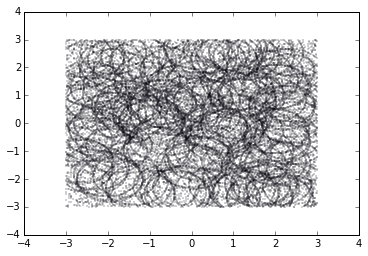

In [5]:
plt.scatter(x,y,s=0.05)
plt.figure(figsize=(10,10))#genero la imagen. ta feaaa

In [6]:
print x.max()
print y.max()
print x.min()
print y.min() 

2.999934
2.999842
-2.999379
-2.999982


In [7]:
im = np.zeros((1024,1024))#genera una matriz con la que se trabajara
div=6./1024
for i in range (npo):
    im[int(y[i]/div), int(x[i]/div)]=1.0# asigna un valor de 1 a cada 
    #pareja de valores que generan un punto 

In [8]:
im_fft = fft2(im)#trasformada de la matriz
co_fft = fftshift(im_fft*im_fft.conjugate())#la autocorrelacion es el 
#la norma al cuadrado de la trasformada original y el shift mueve la 
#frecuencia cero del spectro al centro, esto es como centrar los circulos
freq = fftshift(fftfreq(1024,div))

In [9]:
len(abs(co_fft))

1024

In [10]:
cor_cir=np.zeros(1024/2 + 1,dtype=complex)
cnt=1024/2
for i in range (1024):    
    for j in range(1024):
        dist = int(np.sqrt((i-cnt)**2)+(j-cnt)**2)
        if (dist<=cnt):#circulo de mayor radio
            cor_cir[dist] = cor_cir[dist] + co_fft[i,j]
    

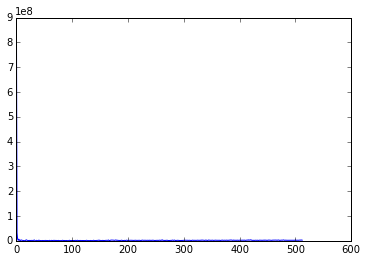

In [11]:
plot(abs(cor_cir))

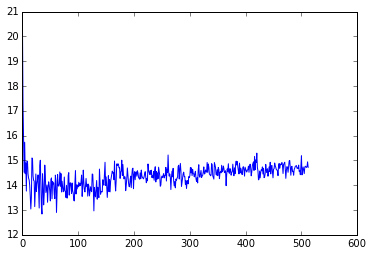

In [12]:
plot(np.log(abs(cor_cir)))#los maximos de la grafica son los circulos
#refleja los maximos de correlación

In [13]:
#tomo la posicion de cada maximo de correlacion.
m=[]
for i in range(1,len(cor_cir)-1):
    if(cor_cir[i]> cor_cir[i-1] and cor_cir[i] > cor_cir[i+1]):
        m.append(i)

In [14]:
#este for toma la distancia entre los maximos, esto corresponderia 
#a 1/diametro ya que nos encontramos en el espacio de numeros de onda
dis=[]
for i in range (1,len(m)):
    dis.append((m[i]-m[i-1])/6.)
   

In [15]:
c=0
dis1=[]
dis1.append(dis[0])
for i in range (1,len(dis)):
    for j in range(len(dis1)):
        
        if (dis[i]==dis1[j]):
            c=1
            
    if(c==0):
        dis1.append(dis[i])
    c=0

In [16]:
for i in range (len(dis1)):
    dis1[i]= 1/dis1[i]


In [17]:
print "los diferentes diametros que encontramos son "
print dis1

los diferentes diametros que encontramos son 
[3.0, 0.6666666666666666, 0.8571428571428571, 1.5, 2.0, 1.2, 1.0, 0.75]
